In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)

תיקונים בדאטה

In [11]:
nba_stat=nba_stat[:510]
nba_stat['FGM']=nba_stat['FGM']-nba_stat['3PM']
nba_stat['FGA']=nba_stat['FGA']-nba_stat['3PA']
nba_stat = nba_stat.rename(columns={'FGM':'2PM','FGA':'2PA'})
nba_stat['FG%']=nba_stat['2PM']/nba_stat['2PA']
nba_stat = nba_stat.rename(columns={'FG%':'2P%'})

חיתוך של התקופות שבכל אחת מהן אני רוצה לעשות רגרסיה

In [12]:
nba_before_2010=nba_stat[nba_stat['SEASON']<'2009-10']
nba_from_2010_to_2013=nba_stat[(nba_stat['SEASON']>'2009-10') & (nba_stat['SEASON']<'2013-14')]
nba_from_2013=nba_stat[nba_stat['SEASON']>'2012-13']

הגרפים שעשיתי אבל לא מראים בצורה מספקת לדעתי את המסר של העליה בקורלציה עם התקופות

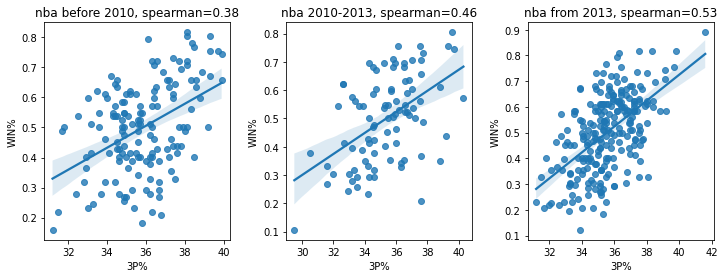

In [15]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3)
sns.regplot(x='3P%',y='WIN%',data=nba_before_2010, ax = ax[0])
ax[0].set_title("nba before 2010, spearman=0.38")
sns.regplot(x='3P%',y='WIN%',data=nba_from_2010_to_2013, ax = ax[1])
ax[1].set_title("nba 2010-2013, spearman=0.46")
sns.regplot(x='3P%',y='WIN%',data=nba_from_2013, ax = ax[2])
ax[2].set_title("nba from 2013, spearman=0.53")
plt.show()

האיור שהצלחתי להגיע אליו, אבל לא הצלחתי לעשות קו לפי תקופה, אלא רק לפי שנים בודדות.

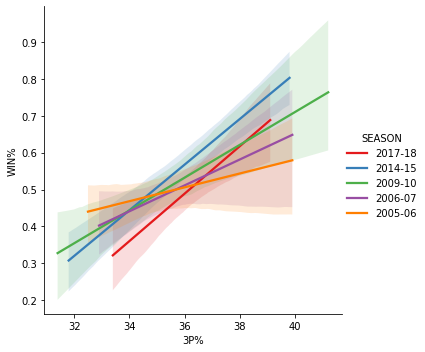

In [14]:
nba_select_priods=nba_stat[(nba_stat['SEASON']=='2005-06')|(nba_stat['SEASON']=='2006-07')|(nba_stat['SEASON']=='2009-10')|(nba_stat['SEASON']=='2014-15')|(nba_stat['SEASON']=='2017-18')]
sns.lmplot(x="3P%", y="WIN%", hue="SEASON", data=nba_select_priods,palette="Set1",scatter=False)